# *Lecture 24*

# Traveling Waves in 1 Dimension

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Wave on String with Free Ends (Not Fixed)

If the string is free at $x=0$, then there is no vertical component of the force there.

$$\begin{align}
F_y  &= -T(0) \left.\frac{\partial y}{\partial x}\right|_{x=0} = 0\\
\left.\frac{\partial y}{\partial x}\right|_{x=0} &= 0 \\
\end{align}$$

The difference equation interprets that 0 derivative in an interesting way:

$$\frac{y_{1,j} - y_{0,j}}{h_x} = 0$$

so that $y_{1,j} = y_{0,j}$ for all time steps $j$.

This case is implemented in the modified program below.

<IPython.core.display.Javascript object>


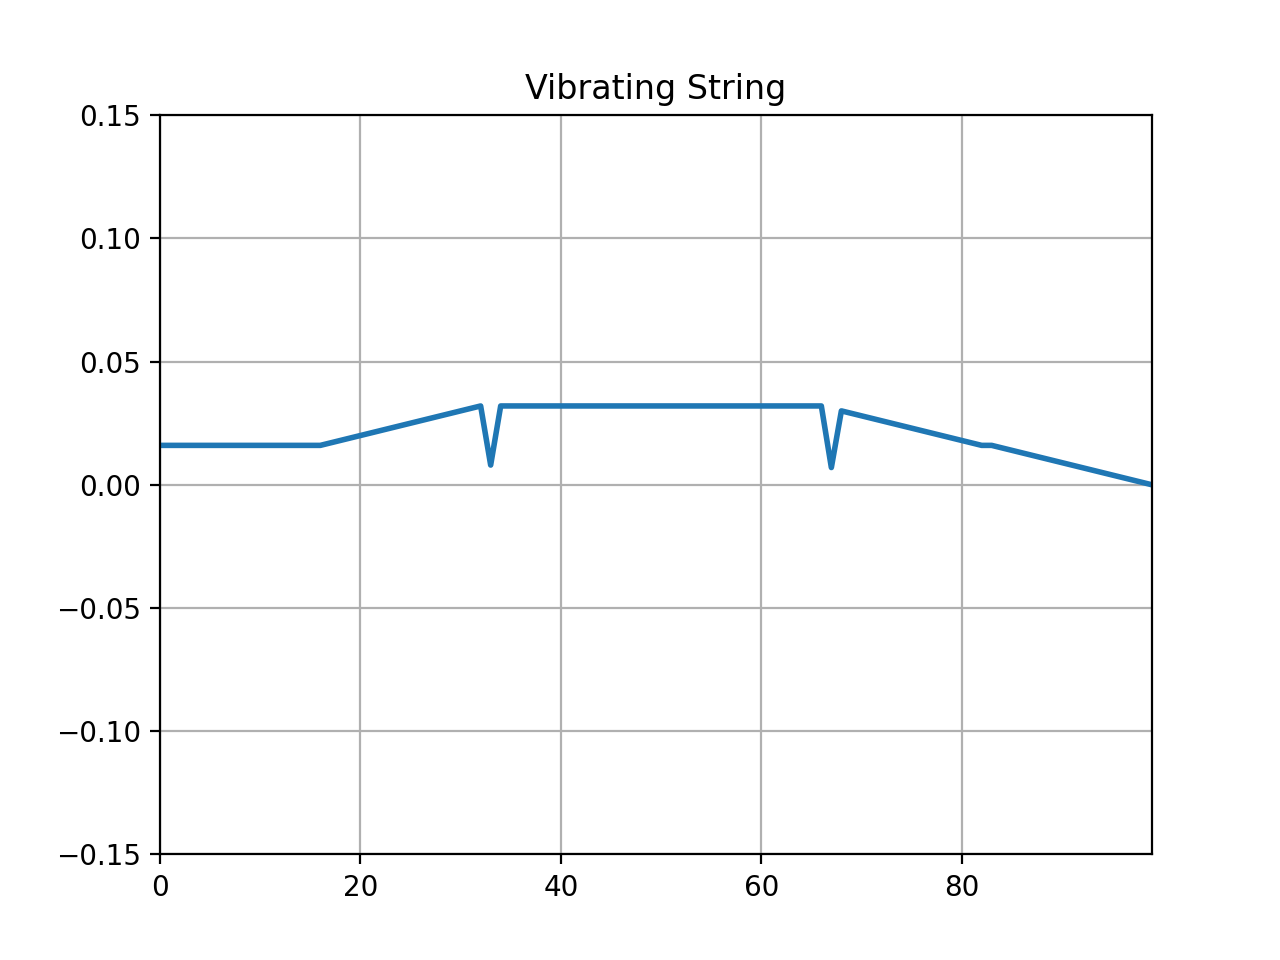

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
N = 100
ten = 40.                                                  # string tension
mu = 0.01
c = np.sqrt(ten/mu)                                       # Propagation speed
c1 = c                                                      # CFL criterion
ratio =  c*c/(c1*c1)
# Initialization
xi = np.zeros( (N, 3), float)                            # 101 x's & 3 t's 
k=range(0,N)
def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.001*i
    for i in range(int(N/2)+1,N):
        xi[i,0] = xi[int(N/2)-1,0] -0.001 * (i-(int(N/2)-1))
        
init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N-1), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    xi[0,2] = xi[1,2]
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,N-1):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             

The end of the string at $x=0$ reacts to the pluck, and the reflection of the pulse is *not* inverted on the free end of the string.

How could you test the effect of the pulse alone, without the triangular pluck that affects the entire string?

### Correcting Dimensions

Now we will try to be more careful with the setup of the length $L$ and step sizes $h_x$ and $h_t$.
The following code calculates the step size from the number of points. 

We also change the initial conditions to give us a sine wave with wavenumber $k$.

*Exercise*: What is the initial condition here, and where is it set?

Note that the step is not actually used in the algorithm!  The **ratio** of the step sizes is used.   We print out that ratio as a check of the Courant criterion for stability. 

Is the resulting calculation stable?  Try different step sizes (numbers of points) and check.

Stability criterion check: 1000.0 2040.8163265306123 0.24009999999999998


<IPython.core.display.Javascript object>


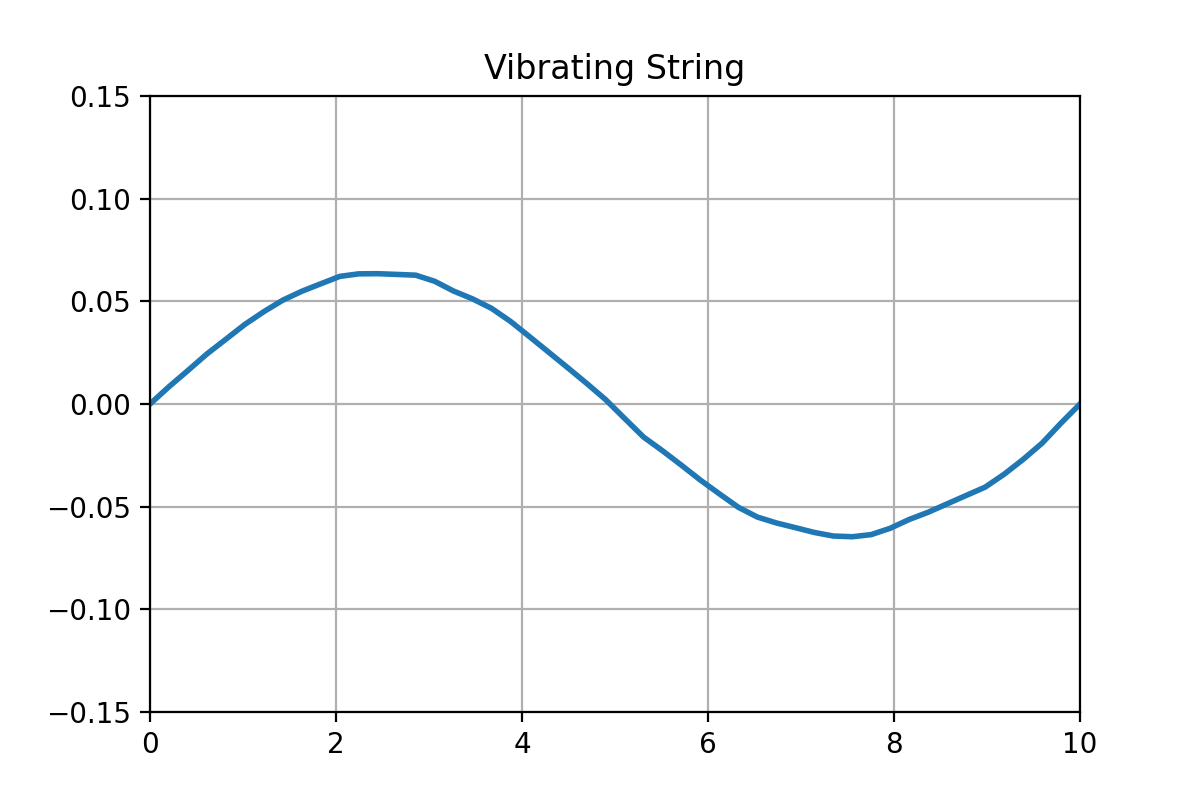

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 10.
m = 1.
N = 50
T = 100000.                                                  # string tension
mu = m/L
c = np.sqrt(T/mu)                                       # Propagation speed
hx = L/(N-1)
ht = 0.0001
cprime = hx/ht
#cprime = c
ratio = pow(c/cprime, 2)
print("Stability criterion check:", c, cprime, ratio)
# Initialization
xi = np.zeros( (N, 3), float)                            
x = np.zeros(N)
k=range(0,N)
for i in k:
    x[i]= i*L/(N-1)
        
def init2(k):
    for i in range(0,N):
        xi[i,0] = 0.1 * np.sin(k*i/(N-1)) 
        
init2(20/np.pi)
fig=plt.figure(figsize=(6,4))                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(x,xi[k,2])                           
    for m in range (0,N):                              
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,

ani = animation.FuncAnimation(fig, animate,1,interval=10)           
plt.show()             

*Exercise*: building on what you know about the stability criterion, how would you cause an instability in this calculation? What would you change, and how would you change it? Try it!

## Follow-up on Stability Condition for 1-D Waves

During the previous lecture, we discussed the stability conditions for numerical solutions to the 1-D wave equation:

$$\frac{\partial^2 y(x,t)}{\partial x^2} = \frac{\rho}{T} \frac{\partial^2 y(x,t)}{\partial t^2}$$

We introduced a *growth factor*, based on the von Neumann stability analysis:

$$\begin{align}
u(x, h_t) &= e^{ikx} + C\frac{h_t}{h_x} \left[ e^{ik(x+h_x)} - e^{ikx} \right] \\
&= \left[ 1 + C\frac{h_t}{h_x}\left( e^{ikh_x} - 1 \right) \right] e^{ikx} \\
&= G(k) e^{ikx} \\
&= G(k) u_0(x) \\
\end{align}$$

The argument was that the *growth factor* or *amplification factor* must be less than 1 so that the numerical solution does not blow up:

$$\begin{align}
|G| & \leq 1 \\
\left| 1-2 C \frac{h_t}{h_x} \right| & \leq 1 \\
-1 + 2C \frac{h_t}{h_x} & \leq 1 \\
C\frac{h_t}{h_x} & \leq 1
\end{align}$$

But we did not see the gradual growth ("blow-up") of the solution for $G>1$.  We just saw a normal solution.
How could we modify the triangular pulse example to show instability?

**The problem** is that the blow-ups can happen too quickly for us to see.
One possibility is that the initial condition involving two triangular pulses did not have well-defined second derivatives.
(We can always calculate the mid-point algorithm approximation to the second derivative over some interval, even if the second derivative at a point in the interval does not exist!)

*Exercise*: Investigate a few things related to the stability condition:
* Fine-tune $h_x/h_t$ to see the uncontrolled growth for the triangular spikes
* Switch to a more "friendly" initial condition: $u_0 (x) = \sin(x)$, and check behavior on both sides of the stability limit
* Switch to a more complex initial condition: $u_0 (x) = A \sin(mx) + \sin(nx)$, and check behavior. (This is coded in `init2`.)


Stability criterion check: 1000.0 1000.0 1.0


<IPython.core.display.Javascript object>


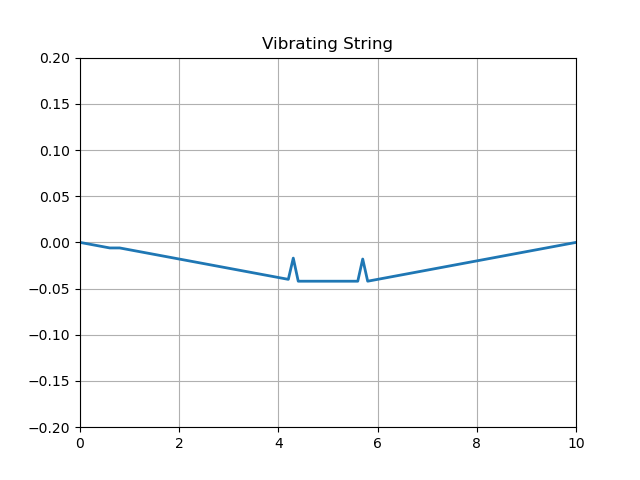

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
L = 10.
m = 1.
N = 101
T = 100000.                               
rho = m/L
c = np.sqrt(T/rho)
hx = L/(N-1)
ht = 0.0001
cprime = hx/ht
ratio = pow(c/cprime, 2)
print("Stability criterion check:", c, cprime, ratio)
# Initialization
xi = np.zeros( (N, 3), float)                            
x = np.zeros(N)
k=range(0,N)
for i in k:
    x[i]= i*L/(N-1)

def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.1/(N-1)*i
    for i in range(int(N/2)+1,N-1):
        xi[i,0] = xi[int(N/2)-1,0] -0.1/(N-1) * (i-(int(N/2)-1))

def init2():
    # sin wave initial condition
    for i in range(0,N):
        xi[i,0] = 0.1 * (np.sin(np.pi*i/(N-1)) + 1*np.sin(2*np.pi*i/(N-1)))
        
init()                                     # plot string initial position   
#init2()
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-0.2, 0.2))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(x,xi[k,2])                           
    for m in range (0,N):                              
        xi[m, 0] = xi[m, 1]                        
        xi[m, 1] = xi[m, 2]
    return line,

ani = animation.FuncAnimation(fig, animate,1,interval=10)           
plt.show()             

## Arbitrary and Traveling 1-D Waves

Having a discontinuity in the second derivative is not a fatal flaw to the numerical solution.

We can define an initial condition with a discontinuous first derivative (sine function over limited interval) and still have a stable solution if $|G|\leq 1$.

Here we have
* sine function over limited interval
* Gaussian pulse that falls apart into two traveling wave pulses

1000.0 1000.0 1.0


<IPython.core.display.Javascript object>


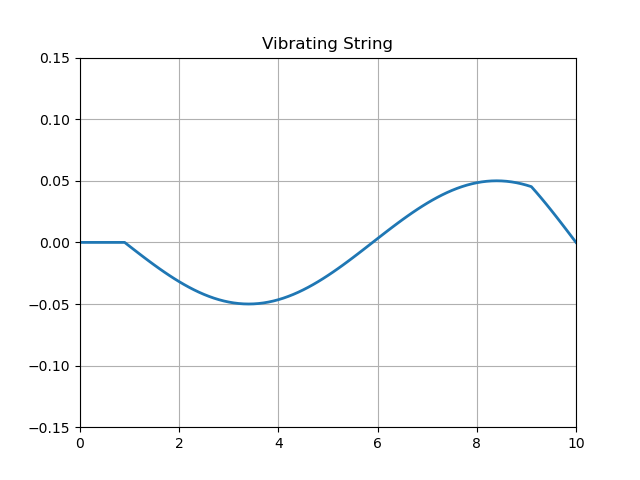

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.animation as animation

# Parameters
L = 10.
m = 1.
N = 101
T = 100000.                               
rho = m/L
c = np.sqrt(T/rho)
hx = L/(N-1)
ht = 0.0001
cprime = hx/ht
ratio = pow(c/cprime, 2)
print(c, cprime, ratio)
# Initialization
xi = np.zeros( (N, 3), float)                            
x = np.zeros(N)
k=range(0,N)
for i in k:
    x[i]= i*L/(N-1)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def init():
    for i in range(0,int(N/2)):
        xi[i,0] = 0.1 * (np.sin(2*np.pi*i/(N-1)))
def init2():
    for i in range(0,N):
        xi[i,0] = 0.2*gaussian(i, N/2, L/8)

init()                                     # plot string initial position  
#init2()
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String")
line, = ax.plot(k, xi[k,0], lw=2)             # x axis, y values, linewidth=2     

# Get started with first two time steps
for i in range(1, N-1):                                      
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(x,xi[k,2])                           
    for m in range (0,N):                              
        xi[m, 0] = xi[m, 1]                        
        xi[m, 1] = xi[m, 2]
    return line,

ani = animation.FuncAnimation(fig, animate,1,interval=20)           
plt.show()             